In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import glob

In [102]:
f = open("transcripts/20190207/text_T12-14_mins.txt", "r")
transcript_texts = f.read()
transcript_texts

"[00:00:00,000]By the way, is this anyone's first handbag?\n[00:00:24,000]How many people have done it?\n[00:00:44,000]Okay, start to wrap up if you're still going, that's fine.\n[00:00:53,000]Start to coalesce them if you can.\n[00:01:03,000]Is anyone still on the wait list?\n[00:01:13,000]Is there anything that I don't know about?\n[00:01:26,000]Maybe people can sense there's a pop quiz coming.\n[00:01:46,000]Okay, we have them all?\n[00:01:54,000]Yes, final call?\n[00:01:56,000]Okay, so very quickly here, PowerPoint."

In [103]:
import pandas as pd

with open('transcripts/20190207/text_T12-14_mins.txt', 'r') as f:
    res = f.read()

records = [list(map(str.strip, line.strip().split(']'))) for line in res.split('\n')]
records

[['[00:00:00,000', "By the way, is this anyone's first handbag?"],
 ['[00:00:24,000', 'How many people have done it?'],
 ['[00:00:44,000',
  "Okay, start to wrap up if you're still going, that's fine."],
 ['[00:00:53,000', 'Start to coalesce them if you can.'],
 ['[00:01:03,000', 'Is anyone still on the wait list?'],
 ['[00:01:13,000', "Is there anything that I don't know about?"],
 ['[00:01:26,000', "Maybe people can sense there's a pop quiz coming."],
 ['[00:01:46,000', 'Okay, we have them all?'],
 ['[00:01:54,000', 'Yes, final call?'],
 ['[00:01:56,000', 'Okay, so very quickly here, PowerPoint.']]

In [109]:
text_files = glob.glob('transcripts/20190207/*.txt')
text_files

['transcripts/20190207/text_T78-80_mins.txt',
 'transcripts/20190207/text_T0-2_mins.txt',
 'transcripts/20190207/text_T58-60_mins.txt',
 'transcripts/20190207/text_T72-74_mins.txt',
 'transcripts/20190207/text_T42-44_mins.txt',
 'transcripts/20190207/text_T22-24_mins.txt',
 'transcripts/20190207/text_T2-4_mins.txt',
 'transcripts/20190207/text_T12-14_mins.txt',
 'transcripts/20190207/text_T18-20_mins.txt',
 'transcripts/20190207/text_T32-34_mins.txt',
 'transcripts/20190207/text_T52-54_mins.txt',
 'transcripts/20190207/text_T62-64_mins.txt',
 'transcripts/20190207/text_T4-6_mins.txt',
 'transcripts/20190207/text_T38-40_mins.txt',
 'transcripts/20190207/text_T70-72_mins.txt',
 'transcripts/20190207/text_T40-42_mins.txt',
 'transcripts/20190207/text_T20-22_mins.txt',
 'transcripts/20190207/text_T10-12_mins.txt',
 'transcripts/20190207/text_T36-38_mins.txt',
 'transcripts/20190207/text_T64-66_mins.txt',
 'transcripts/20190207/text_T54-56_mins.txt',
 'transcripts/20190207/text_T66-68_mins.

In [104]:
start_time_min = Path(f.name).name.split('T')[1].split('-')[0]
start_time_min

'12'

In [52]:
l = []
for record in records:
    d = {}
    d['timestamp'] = record[0].replace('[', '').split(',')[0]
    for r in record[1:]:
        # key = r.split(' ')[1]
        # value = r.split(' ')[0]
        key = 'transcript'
        d[key] = r

    l.append(d)

In [67]:
l

[{'timestamp': '00:00:00',
  'transcript': "By the way, is this anyone's first handbag?"},
 {'timestamp': '00:00:24', 'transcript': 'How many people have done it?'},
 {'timestamp': '00:00:44',
  'transcript': "Okay, start to wrap up if you're still going, that's fine."},
 {'timestamp': '00:00:53', 'transcript': 'Start to coalesce them if you can.'},
 {'timestamp': '00:01:03', 'transcript': 'Is anyone still on the wait list?'},
 {'timestamp': '00:01:13',
  'transcript': "Is there anything that I don't know about?"},
 {'timestamp': '00:01:26',
  'transcript': "Maybe people can sense there's a pop quiz coming."},
 {'timestamp': '00:01:46', 'transcript': 'Okay, we have them all?'},
 {'timestamp': '00:01:54', 'transcript': 'Yes, final call?'},
 {'timestamp': '00:01:56',
  'transcript': 'Okay, so very quickly here, PowerPoint.'}]

In [105]:
df = pd.DataFrame(l).fillna(0)
pd.to_datetime(df['timestamp'], format='%H:%M:%S')
df['timestamp'] = (df['timestamp'] + pd.Timedelta(minutes=int(start_time_min))).astype(str).str.split('0 days ').str[-1]
# pd.to_datetime(df['timestamp'], format='%d %H:%M:%S').dt.strftime('%H:%M:%S')

In [106]:
df

,timestamp,transcript
0,00:12:00,"By the way, is this anyone's first handbag?"
1,00:12:24,How many people have done it?
2,00:12:44,"Okay, start to wrap up if you're still going, ..."
3,00:12:53,Start to coalesce them if you can.
4,00:13:03,Is anyone still on the wait list?
5,00:13:13,Is there anything that I don't know about?
6,00:13:26,Maybe people can sense there's a pop quiz coming.
7,00:13:46,"Okay, we have them all?"
8,00:13:54,"Yes, final call?"
9,00:13:56,"Okay, so very quickly here, PowerPoint."


In [107]:
df.transcript[(df.timestamp < "00:13:00") & (df.timestamp > "00:12:50")]

3    Start to coalesce them if you can.
Name: transcript, dtype: object

In [99]:
df.transcript[(df.timestamp < "00:13:00") & (df.timestamp > "00:12:50")]

3    Start to coalesce them if you can.
Name: transcript, dtype: object

In [78]:
df.head()

,timestamp,transcript
0,0 days 00:12:00,"By the way, is this anyone's first handbag?"
1,0 days 00:12:24,How many people have done it?
2,0 days 00:12:44,"Okay, start to wrap up if you're still going, ..."
3,0 days 00:12:53,Start to coalesce them if you can.
4,0 days 00:13:03,Is anyone still on the wait list?


In [24]:
np.unique(sample.iloc[0, 1:].values, return_counts=True)

(array(['fear', 'neutral', 'none', 'sad'], dtype=object),
 array([ 2,  1, 38,  2]))

In [32]:
emotions_list = ['sad', 'angry', 'surprise', 'fear', 'happy', 'disgust', 'neutral']

all_emotion_ratios = []
for row in range(sample.shape[0]):
    emotion_ratios = {key:0 for key in emotions_list}
    emotion, counts = np.unique(sample.iloc[row, 1:].values, return_counts=True)
    idx_none = emotion == 'none'
    emotion_not_none = emotion[~idx_none]
    ratio = counts[~idx_none]/np.sum(counts[~idx_none])
    for emo, rats in zip(emotion_not_none, ratio):
        emotion_ratios[emo] = rats
    all_emotion_ratios.append(emotion_ratios)

In [33]:
all_emotion_ratios

[{'sad': 0.4,
  'angry': 0,
  'surprise': 0,
  'fear': 0.4,
  'happy': 0,
  'disgust': 0,
  'neutral': 0.2},
 {'sad': 0.4,
  'angry': 0,
  'surprise': 0,
  'fear': 0.4,
  'happy': 0,
  'disgust': 0,
  'neutral': 0.2},
 {'sad': 0,
  'angry': 0.5,
  'surprise': 0,
  'fear': 0.5,
  'happy': 0,
  'disgust': 0,
  'neutral': 0},
 {'sad': 0.5,
  'angry': 0,
  'surprise': 0,
  'fear': 0.5,
  'happy': 0,
  'disgust': 0,
  'neutral': 0},
 {'sad': 0,
  'angry': 0,
  'surprise': 0,
  'fear': 0,
  'happy': 0,
  'disgust': 0,
  'neutral': 0},
 {'sad': 0.2,
  'angry': 0.3,
  'surprise': 0,
  'fear': 0.3,
  'happy': 0,
  'disgust': 0,
  'neutral': 0.2},
 {'sad': 0.5,
  'angry': 0,
  'surprise': 0,
  'fear': 0,
  'happy': 0,
  'disgust': 0.125,
  'neutral': 0.375},
 {'sad': 0.36363636363636365,
  'angry': 0.09090909090909091,
  'surprise': 0,
  'fear': 0.36363636363636365,
  'happy': 0,
  'disgust': 0,
  'neutral': 0.18181818181818182},
 {'sad': 0.3,
  'angry': 0.2,
  'surprise': 0.1,
  'fear': 0.3,
  

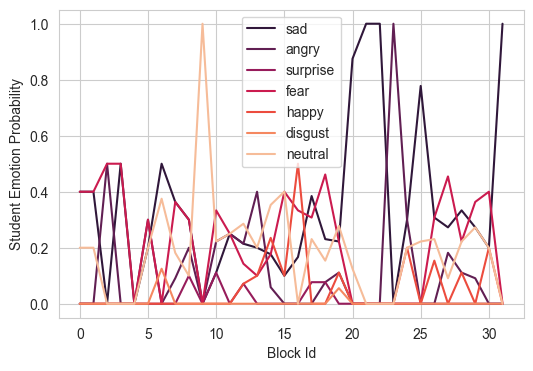

In [60]:
fig, ax = plt.subplots(figsize=(6, 4))
cmaps = sns.color_palette('rocket', n_colors=len(emotions_list))
for cmap, selected_emotions in zip(cmaps, emotions_list):
    sns.lineplot(x=np.arange(len([all_emotion_ratios[i][selected_emotions] for i in range(len(all_emotion_ratios))])),
        y=[all_emotion_ratios[i][selected_emotions] for i in range(len(all_emotion_ratios))], color=cmap, ax=ax, label=selected_emotions)
ax.set_xlabel('Block Id')
ax.set_ylabel('Student Emotion Probability')
fig.savefig('emotion_sample.png', bbox_inches='tight', dpi=300)

In [48]:
sns.color_palette('rocket', n_colors=len(emotions_list))


[(0.18643324, 0.09165431, 0.22699705),
 (0.38092887, 0.12061482, 0.32506528),
 (0.59096382, 0.10810205, 0.35847347),
 (0.7965014, 0.10506637, 0.31063031),
 (0.92676657, 0.29823282, 0.24285536),
 (0.95922872, 0.53307513, 0.3748895),
 (0.96592829, 0.73844258, 0.60053991)]

In [54]:
cmap

(0.96592829, 0.73844258, 0.60053991)